In [6]:
N = 50000
totient = [0] * (N+1)
sigma = [0] * (N+1)

with open("data.csv") as h:
    for line in h.read().split("\n"):
        a, b, c = map(int, line.split(" "))
        totient[a] = b
        sigma[a] = c
        if a == N: break



In [7]:
import math
c = 6**0.5 / math.pi

import numpy as np
import matplotlib.pyplot as plt

In [8]:
from collections import Counter

pfactorize = [Counter() for _ in range(N + 1)]

def init_pfactorize():
    for i in range(2, N + 1):
        if pfactorize[i]:
            continue
        
        pow_i = i
        while pow_i <= N:
            for j in range(pow_i, N + 1, pow_i):
                pfactorize[j][i] += 1
            if pow_i > N // i:
                break
            pow_i *= i

init_pfactorize()

In [12]:
from fractions import Fraction

n_max = min(N, 1000000)
def f(x):
    return Fraction(totient[x]*sigma[x], x**2)
print("Defined f(n) = phi(n)sigma(n)/n^2")

Defined f(n) = phi(n)sigma(n)/n^2


In [16]:
print(f(3))
print(f(8), f(27), f(5))
print(f(8), f(81), f(5), f(11))

8/9
15/16 80/81 24/25
15/16 242/243 24/25 120/121


In [9]:
GM = [(totient[i]*sigma[i])**0.5 for i in range(N+1)]

GM_norm = [0] + [GM[i]/i for i in range(1, N+1)]


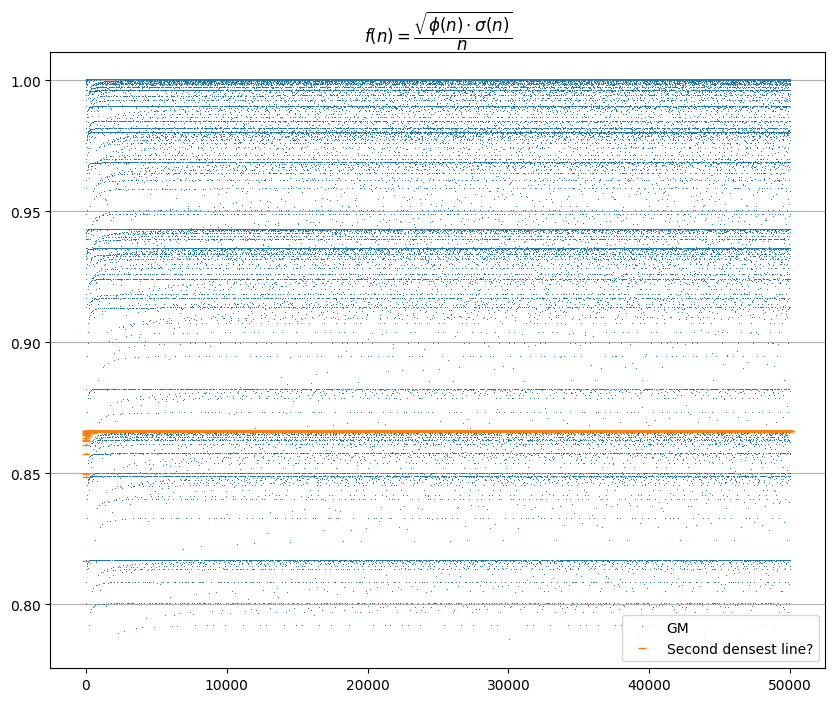

In [10]:

import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8), dpi=100)
x = np.arange(1, N+1)
plt.plot(x, GM_norm[1:N+1], ',', label='GM')

x_2p = np.array([i for i in range(1, N+1) if pfactorize[i][2] == 1 and len(list(pfactorize[i])) <= 2])
plt.plot(x_2p, [GM_norm[x] for x in x_2p], '_', label='Second densest line?')

# Customize the plot
plt.title('$f(n) = \dfrac{\sqrt{\phi(n)\cdot\sigma(n)}}{n}$')
plt.legend()
plt.grid(True, axis='y')
plt.show()

